# 第 5 章：神经网络

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 1. 逻辑回归

### 数据集

从 `sklearn` 库中导入 `make_moon` 数据集

In [2]:
import sklearn.datasets

np.random.seed(1)    # 设置随机种子
X, Y = sklearn.datasets.make_moons(n_samples=200, noise=.2)    # 导入 make_moon 数据集，样本个数 m=200，噪声标准差为 0.2
X, Y = X.T, Y.reshape(1, Y.shape[0])    # X shape: [2,200]，Y shape: [1,200]
m = X.shape[1]    # 样本个数
dim = X.shape[0]    # 特征维度

In [3]:
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (2, 200)
Y shape:  (1, 200)


绘制数据分布散点图

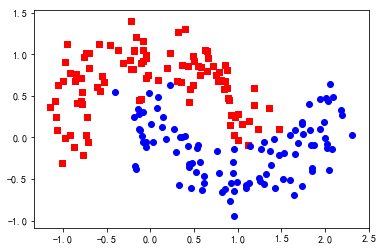

In [4]:
plt.scatter(X[0, Y[0,:]==0], X[1, Y[0,:]==0], c='r', marker='s')    # 负类
plt.scatter(X[0, Y[0,:]==1], X[1, Y[0,:]==1], c='b', marker='o')    # 正类
plt.show()

### 梯度下降优化算法

代价函数（Cost Fucntion）：

$$J=-\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log\hat y^{(i)}+(1-y^{(i)})log(1-\hat y^{(i)})$$

梯度下降（Gradient Descent）：

$$\frac{\partial J}{\partial W} = \frac{1}{m}X(\hat Y-Y)^T$$
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat y^{(i)}-y^{(i)})$$

定义 Sigmoid 函数：

In [5]:
def sigmoid(x):
    """
    函数输入：
        - x：sigmoid 函数输入

    函数输出：
        - y：sigmoid 输出
    """
    y = 1 / (1 + np.exp(-x))
    
    return y

定义逻辑回归优化算法：

In [6]:
def optimizer(X, Y, num_iterations=200, learning_rate=0.01):
    """
    函数输入：
        - X：输入数据特征，维度 = (dim, m)
        - Y：输入数据标签，维度 = (1, m)
        - num_iteration：训练次数
        - learning_rate：学习速率
    函数输出：
        - W：训练后的权重参数
        - b：训练后的偏置参数
        - cost：每次训练计算的损失存放在 cost 列表中
    """
    cost = []         # 列表，存放每次训练的损失
    m = X.shape[1]    # 样本个数
    dim = X.shape[0]  # 特征维度
    
    # 参数初始化
    W = np.zeros((dim, 1))
    b = 0
    
    # 迭代训练
    for i in range(num_iterations):
        Z = np.dot(W.T, X) + b    # 线性部分
        Y_hat = sigmoid(Z)    # 非线性部分
        J = -1.0 / m * np.sum(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))    # 代价函数
        cost.append(J)
        
        # 梯度下降
        dW = 1.0 / m * np.dot(X, (Y_hat - Y).T)
        db = 1.0 / m * np.sum(Y_hat - Y)
        W = W - learning_rate * dW    # W 更新公式
        b = b - learning_rate * db    # b 更新公式
    
        if (i+1) % 20 == 0:
            print('Iteration: %d, J = %f' % (i+1, J))
        
    return W, b, cost

### 训练

In [7]:
W, b, cost = optimizer(X, Y, num_iterations=500, learning_rate=0.2)

Iteration: 20, J = 0.498805
Iteration: 40, J = 0.428957
Iteration: 60, J = 0.394773
Iteration: 80, J = 0.374171
Iteration: 100, J = 0.360129
Iteration: 120, J = 0.349796
Iteration: 140, J = 0.341803
Iteration: 160, J = 0.335412
Iteration: 180, J = 0.330182
Iteration: 200, J = 0.325829
Iteration: 220, J = 0.322163
Iteration: 240, J = 0.319044
Iteration: 260, J = 0.316370
Iteration: 280, J = 0.314063
Iteration: 300, J = 0.312062
Iteration: 320, J = 0.310317
Iteration: 340, J = 0.308789
Iteration: 360, J = 0.307447
Iteration: 380, J = 0.306263
Iteration: 400, J = 0.305216
Iteration: 420, J = 0.304287
Iteration: 440, J = 0.303460
Iteration: 460, J = 0.302723
Iteration: 480, J = 0.302063
Iteration: 500, J = 0.301473


训练后的参数 $W$ 和 $b$

In [8]:
print('W = ', W)
print('b = ', b)

W =  [[ 1.14041084]
 [-3.8333394 ]]
b =  0.35047882396508423


显示训练过程中的损失 cost

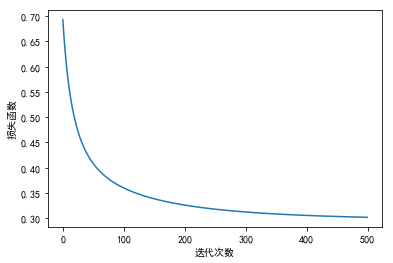

In [9]:
plt.plot(cost)
plt.xlabel('迭代次数')
plt.ylabel('损失函数')
plt.show()

### 预测

定义预测函数

In [10]:
def predict(X, W, b):
    """
    函数输入：
        - X：输入数据特征，维度 = (dim, m)
        - W：训练后的权重参数
        - b：训练后的偏置参数
    函数输出：
        - Y_pred：预测输出标签，维度 = (1, m)
    """
    
    Y_pred = np.zeros((1, X.shape[1]))    # 初始化 Y_pred
    
    Z = np.dot(W.T, X) + b    # 线性部分
    Y_hat = sigmoid(Z)    # 非线性部分
    Y_pred[Y_hat > 0.5] = 1    # Y_hat 大于 0.5 的预测为正类

    return Y_pred

对输入数据 X 进行预测

In [11]:
Y_pred = predict(X, W, b)
print(Y_pred)

[[0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
  0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
  1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
  1. 1. 0. 1. 1. 0. 1. 0.]]


计算预测准确率

In [12]:
accuracy = np.mean(Y_pred == Y)
print(accuracy)

0.86


绘制分类直线，可视化分类效果

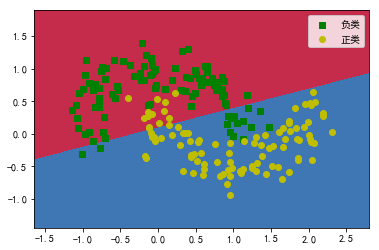

In [13]:
from matplotlib.colors import ListedColormap
    
x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
step = 0.001
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
Z = predict(np.c_[xx.ravel(), yy.ravel()].T, W, b)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)    # 绘制边界
plt.scatter(X[0, Y[0,:]==0], X[1, Y[0,:]==0], c='g', marker='s', label='负类')    # 负类
plt.scatter(X[0, Y[0,:]==1], X[1, Y[0,:]==1], c='y', marker='o', label='正类')    # 正类
plt.legend()
plt.show()

## 2. 神经网络

### 数据集

从 `sklearn` 库中导入 `make_moon` 数据集

In [14]:
import sklearn.datasets

np.random.seed(1)    # 设置随机种子
X, Y = sklearn.datasets.make_moons(n_samples=200, noise=.2)    # 导入 make_moon 数据集，样本个数 m=200，噪声标准差为 0.2
X, Y = X.T, Y.reshape(1, Y.shape[0])    # X shape: [2,200]，Y shape: [1,200]
m = X.shape[1]    # 样本个数
dim = X.shape[0]    # 特征维度

In [15]:
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

X shape:  (2, 200)
Y shape:  (1, 200)


绘制数据分布散点图

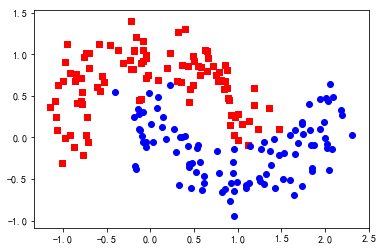

In [16]:
plt.scatter(X[0, Y[0,:]==0], X[1, Y[0,:]==0], c='r', marker='s')    # 负类
plt.scatter(X[0, Y[0,:]==1], X[1, Y[0,:]==1], c='b', marker='o')    # 正类
plt.show()

### 参数初始化

In [17]:
def initialize_parameters(n_x, n_h, n_y):
    """
    函数输入：
        - n_x：输入层维度
        - n_h：隐藏层神经元个数
        - n_y：输出层神经元个数
    函数输出：
        - parameters：存储参数字典，W1, b1, W2, b2
    """
    
    np.random.seed(0)    # 设置随机种子
    
    # 参数初始化
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parameters

### 前向传播

定义 Sigmoid 激活函数：

In [18]:
def sigmoid(z):
    """
    函数输入：
        - z：激活函数输入，神经元线性输出
        - a：激活函数输出，神经元非线性输出
    """
    
    a = 1 / (1 + np.exp(-z))
    
    return a

定义前向传播函数：

In [19]:
def forward_propagation(X, parameters):
    """
    函数输入：
        - X：神经网络输入
        - parameters：神经网络参数
    函数输出：
        - A2: 神经网络输出
        - cache： 缓存，存储中间变量：Z1, A1, Z2, A2
    """
    
    # 神经网络参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # 输入层 —> 隐藏层
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    # 隐藏层 —> 输出层
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return A2, cache

### 计算损失

In [20]:
def compute_loss(A2, Y):
    """
    函数输入：
        - A2：神经网络输出
        - Y：样本真实标签
    函数输出：
        - cost: 神经网络交叉熵损失
    """
    
    #样本个数
    m = Y.shape[1]
    
    cross_entropy = -(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    cost = 1.0 / m * np.sum(cross_entropy)
    
    return cost

### 反向传播

In [21]:
def back_propagation(X, Y, parameters, cache):
    """
    函数输入：
        - X：神经网络输入
        - Y：样本真实标签
        - parameters: 网络参数
        - cache: 缓存，存储中间变量：Z1, A1, Z2, A2
    函数输出：
        - grads: 神经网络参数梯度
    """
    
    # 样本个数
    m = X.shape[1]
    
    # 神经网络参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # 中间变量
    Z1 = cache['Z1']
    A1 = cache['A1']
    Z2 = cache['Z2']
    A2 = cache['A2']
    
    # 计算梯度
    dZ2 = A2 - Y
    dW2 = 1.0 / m * np.dot(dZ2, A1.T)
    db2 = 1.0 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1.0 / m * np.dot(dZ1, X.T)
    db1 = 1.0 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        'dW1': dW1,
        'db1': db1,
        'dW2': dW2,
        'db2': db2
    }
    
    return grads

### 更新参数

In [22]:
def update_parameters(parameters, grads, learning_rate=0.1):
    """
    函数输入：
        - parameters: 网络参数
        - grads: 神经网络参数梯度
    函数输出：
        - parameters: 网络参数
    """
    
    # 神经网络参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # 神经网络参数梯度
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # 梯度下降算法
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parameters

### 构建神经网络模型并训练

定义模型：

In [23]:
def nn_model(X, Y, n_h=3, num_iterations=200, learning_rate=0.1):
    """
    函数输入：
        - X：神经网络输入
        - Y：样本真实标签
        - n_h: 隐藏层神经元个数
        - num_iterations: 训练次数
        - learning_rate: 学习率
    函数输出：
        - parameters: 训练完成后的网络参数
    """
    
    # 定义网络
    n_x = X.shape[0]
    n_y = 1
    
    # 参数初始化
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # 迭代训练
    for i in range(num_iterations):
        # 正向传播
        A2, cache = forward_propagation(X, parameters)
    
        # 计算交叉熵损失
        cost = compute_loss(A2, Y)
    
        # 反向传播
        grads = back_propagation(X, Y, parameters, cache)
        
        # 更新参数
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # print 
        if (i+1) % 20 == 0:
            print('Iteration: %d, cost = %f' % (i+1, cost))
    
    return parameters

训练：

In [24]:
parameters = nn_model(X, Y, n_h=3, 
                      num_iterations=500, 
                      learning_rate=0.2)

Iteration: 20, cost = 0.507616
Iteration: 40, cost = 0.439151
Iteration: 60, cost = 0.391370
Iteration: 80, cost = 0.361023
Iteration: 100, cost = 0.342224
Iteration: 120, cost = 0.329463
Iteration: 140, cost = 0.319611
Iteration: 160, cost = 0.311118
Iteration: 180, cost = 0.303405
Iteration: 200, cost = 0.296525
Iteration: 220, cost = 0.290603
Iteration: 240, cost = 0.285411
Iteration: 260, cost = 0.280535
Iteration: 280, cost = 0.275642
Iteration: 300, cost = 0.270521
Iteration: 320, cost = 0.265057
Iteration: 340, cost = 0.259190
Iteration: 360, cost = 0.252913
Iteration: 380, cost = 0.246268
Iteration: 400, cost = 0.239345
Iteration: 420, cost = 0.232268
Iteration: 440, cost = 0.225162
Iteration: 460, cost = 0.218133
Iteration: 480, cost = 0.211262
Iteration: 500, cost = 0.204605


### 预测模型

定义预测函数：

In [25]:
def predict(X, parameters):
    """
    函数输入：
        - X：神经网络输入
        - parameters: 训练完成后的网络参数
    函数输出：
        - Y_pred: 预测样本标签
    """
    
    # 神经网络参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # 输入层 —> 隐藏层
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    # 隐藏层 —> 输出层
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # 预测标签
    Y_pred = np.zeros((1, X.shape[1]))    # 初始化 Y_pred
    Y_pred[A2 > 0.5] = 1    # Y_hat 大于 0.5 的预测为正类
    
    return Y_pred

预测：

In [26]:
Y_pred = predict(X, parameters)
print(Y_pred)

[[0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
  1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
  1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
  0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1.
  0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.
  1. 1. 0. 1. 1. 0. 1. 0.]]


计算预测准确率

In [27]:
accuracy = np.mean(Y_pred == Y)
print(accuracy)

0.94


绘制分类直线，可视化分类效果

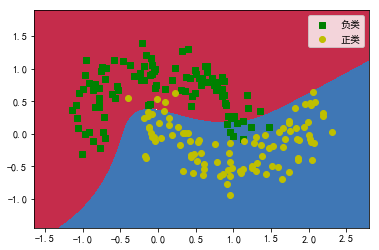

In [28]:
from matplotlib.colors import ListedColormap
    
x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
step = 0.001
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parameters)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)    # 绘制边界
plt.scatter(X[0, Y[0,:]==0], X[1, Y[0,:]==0], c='g', marker='s', label='负类')    # 负类
plt.scatter(X[0, Y[0,:]==1], X[1, Y[0,:]==1], c='y', marker='o', label='正类')    # 正类
plt.legend()
plt.show()